## Trend Line Slopes

Given is the dataset `stores.csv`, which includes the sales per week over a period of one year for five stores.

In [1]:
import pandas as pd

# Read dataset
stores = pd.read_csv('../resources/stores.csv')
stores.head()

,week,store,revenue
0,2020/W1,store1,1008.149772
1,2020/W2,store1,1002.533411
2,2020/W3,store1,1142.720105
3,2020/W4,store1,1200.457436
4,2020/W5,store1,1101.604492


Your task is to estimate the **slope of the trend line** of the revenue growth per week for each store.

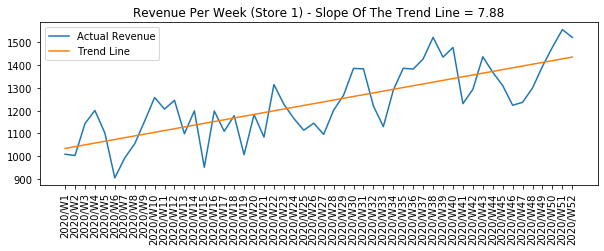

In [2]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Filter to one sample store
sample = stores[stores.store=='store1']

# Get regression coefficients
n = len(sample)
X = np.arange(n).reshape(-1, 1)
y = sample.revenue.values.reshape(-1, 1)
lr = LinearRegression()
lr.fit(X, y)
a0 = lr.intercept_
a1 = lr.coef_[0][0]

# Predict y_hat
y_hat = a0 + a1 * np.arange(len(sample))

# Plot sample
plt.figure(figsize=(10, 3))
plt.title(f"Revenue Per Week (Store 1) - Slope Of The Trend Line = {a1:.2f}")
plt.plot(sample.week, sample.revenue, label='Actual Revenue')
plt.plot(y_hat, label='Trend Line')
plt.xticks(rotation=90)
plt.legend()
plt.show()

The **expected output** is a table with the **slope of the trend line per store**.

In [3]:
# Helper function to calculate slopes based on grouped dataframe
def get_slope(df):
    n = len(df)
    X = np.arange(n).reshape(-1, 1)
    y = df.revenue.values.reshape(-1, 1)
    lr = LinearRegression()
    lr.fit(X, y)
    
    return pd.Series({'slope': lr.coef_[0][0]})

# Get slope for each store
stores.groupby('store').apply(get_slope)

,slope
store,
store1,7.878896
store2,1.021212
store3,-9.732380
store4,5.585330
store5,10.891863
